In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
#nltk.download()

In [3]:
# read the file
data = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [4]:
# view the data
data.head(50)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [5]:
# shape of the data
data.shape

(28619, 3)

In [6]:
data_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 287674 words in the headline


In [7]:
# check the columns names
data.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [8]:
# check the data types in the columns
data.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [9]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([1, 0])

In [10]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

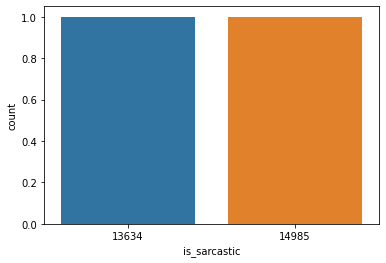

In [11]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
plt.show()

In [12]:
# check the null values in data
data.isna().sum() 

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [13]:
#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [14]:
#check the data
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


Text Cleaning

In [15]:
#import necessary library
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

set_stopwords = set(stopwords.words("english"))

def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['headline'] = data['headline'].apply(clean_txt)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data_clean_len = data['headline'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


Most Common Words

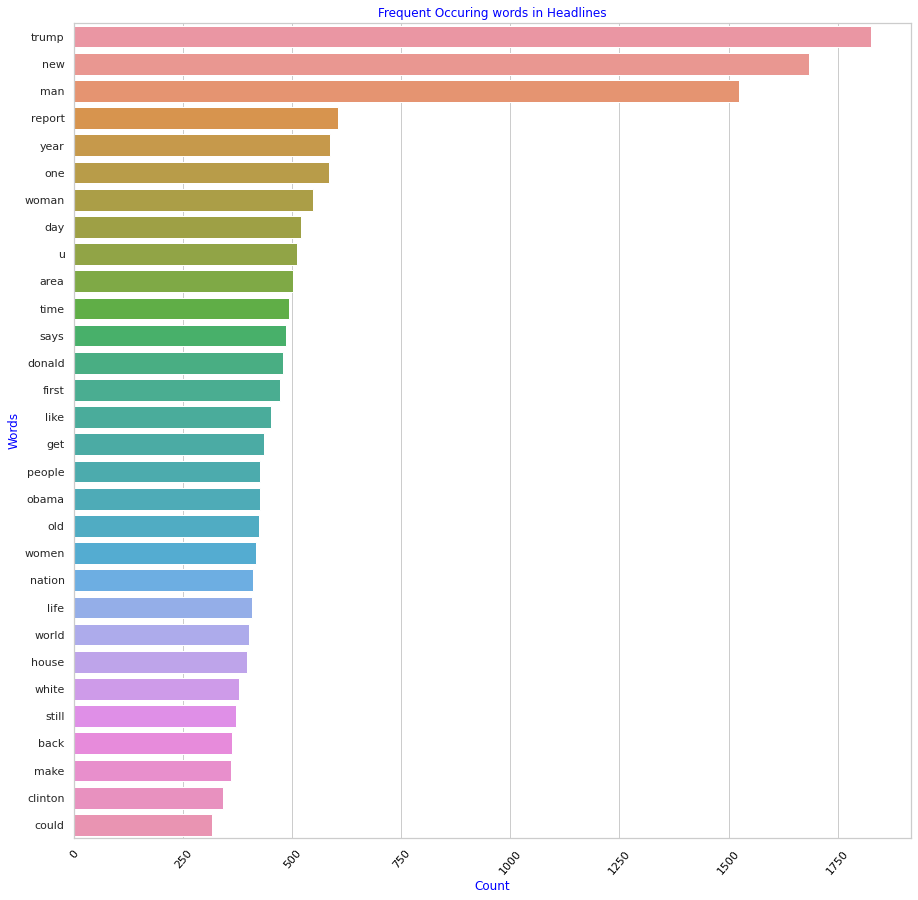

In [17]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = data['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

Finding most common words in 'is_sarcastic' column

In [18]:
#create DataFrame for sarcastic words 
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [19]:
#create DataFrame for non_sarcastic words 
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

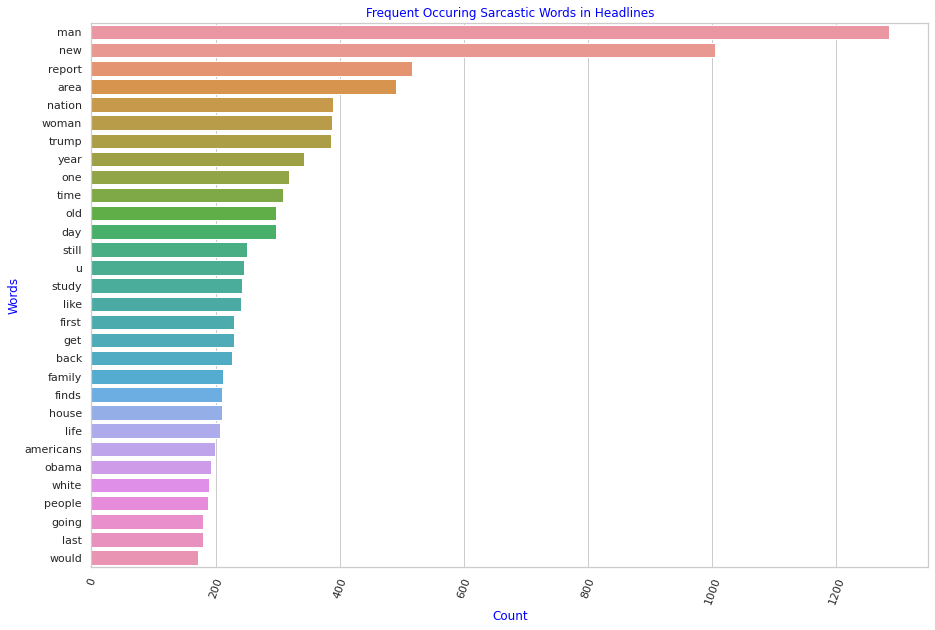

In [20]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=sarcastic['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

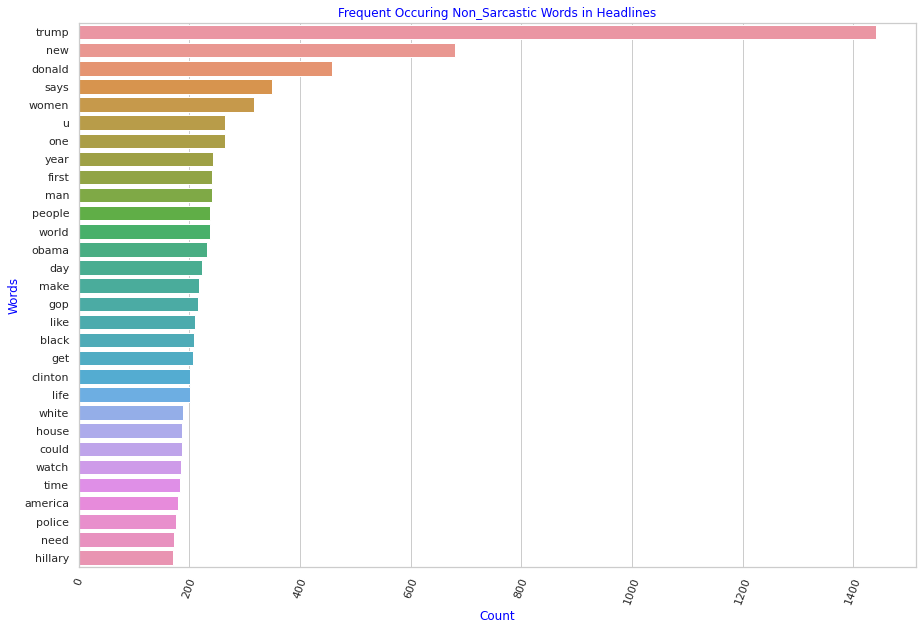

In [21]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=non_sarcastic['index'][0:30], x=non_sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Non_Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

WordCloud Vizualization with StopWords

In [22]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


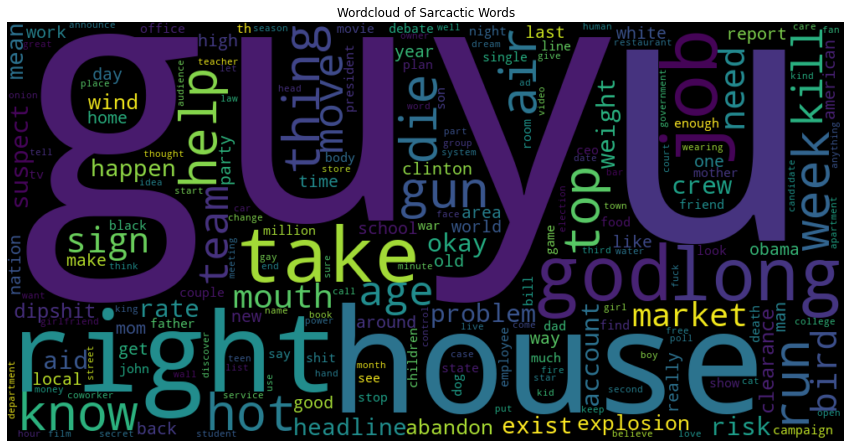

In [24]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords, 
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

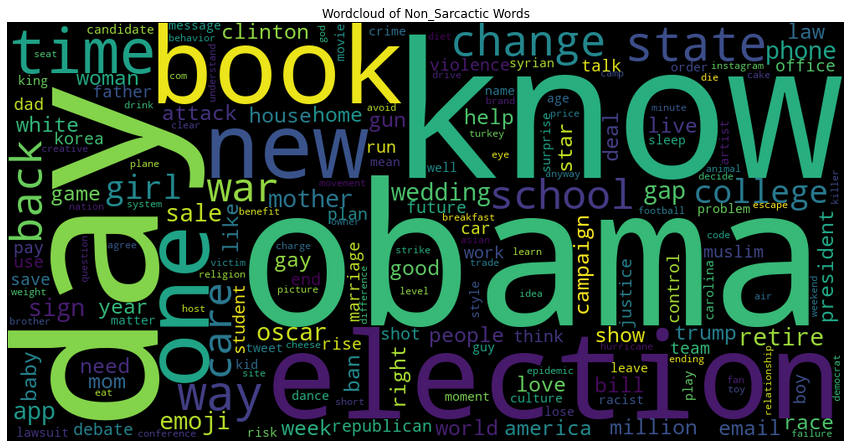

In [25]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

Text Pre-Processing

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['headline']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names())
df

,ab,abandon,abandoned,abandoning,abandons,abayas,abbas,abbey,abbi,abby,...,zookeeper,zoolander,zoologist,zoologists,zoomed,zoroastrianism,zsa,ztari,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


GloVe Encodings

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data["headline"], data["is_sarcastic"], test_size = 0.3 , random_state = 0)

In [29]:
max_features = 35000
maxlen = 200

In [30]:
import re,string,unicodedata
from keras.preprocessing import text, sequence

In [31]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [32]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [33]:
EMBEDDING_FILE = '../input/glove-twitter/glove.twitter.27B.200d.txt'

In [34]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [35]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [36]:
batch_size = 128
epochs = 2
embed_size = 200

TRAINING GLOVE EMBEDDINGS MODEL

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [38]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

2022-05-20 15:48:32.122424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 15:48:32.242484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 15:48:32.243224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 15:48:32.244367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          4406800   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 4,743,953
Trainable params: 4,743,953
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = 10)

2022-05-20 15:48:35.822037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
157/157 [==============================] - 302s 2s/step - loss: 0.5050 - acc: 0.7490 - val_loss: 0.3973 - val_acc: 0.8229
Epoch 2/10
157/157 [==============================] - 298s 2s/step - loss: 0.2397 - acc: 0.9023 - val_loss: 0.4435 - val_acc: 0.8201
Epoch 3/10
157/157 [==============================] - 297s 2s/step - loss: 0.1114 - acc: 0.9584 - val_loss: 0.6004 - val_acc: 0.8145
Epoch 4/10
157/157 [==============================] - 297s 2s/step - loss: 0.0595 - acc: 0.9783 - val_loss: 0.7889 - val_acc: 0.8111
Epoch 5/10
157/157 [==============================] - 297s 2s/step - loss: 0.0352 - acc: 0.9872 - val_loss: 1.1122 - val_acc: 0.8117
Epoch 6/10
157/157 [==============================] - 299s 2s/step - loss: 0.0270 - acc: 0.9902 - val_loss: 1.1426 - val_acc: 0.8041
Epoch 7/10
157/157 [==============================] - 299s 2s/step - loss: 0.0209 - acc: 0.9923 - val_loss: 1.2014 - val_acc: 0.8046
Epoch 8/10
157/157 [==============================] - 300s 2s/step - 

In [41]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

269/269 [==============================] - 30s 111ms/step - loss: 1.3727 - acc: 0.7993
Accuracy of the model on Testing Data is -  79.93244528770447


ANALYSIS AFTER TRAINING OF GLOVE EMBEDDINGS MODEL

In [42]:
pred = (model.predict(X_test) > 0.5).astype("int32")
#pred = model.predict_classes(X_test)
pred[:5]

array([[1],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.81      0.82      0.81      4560
    Sarcastic       0.79      0.78      0.78      4026

     accuracy                           0.80      8586
    macro avg       0.80      0.80      0.80      8586
 weighted avg       0.80      0.80      0.80      8586



In [45]:
cm = confusion_matrix(y_test,pred)
cm

array([[3742,  818],
       [ 905, 3121]])

<AxesSubplot:>

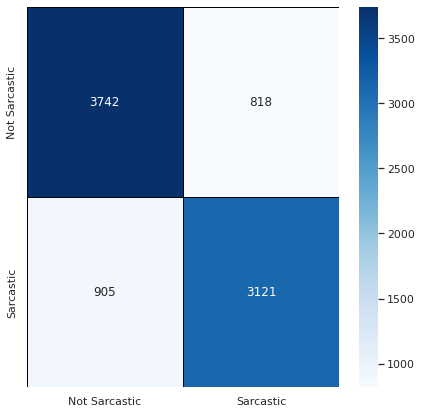

In [46]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])